In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "../../../Risultati/Air_Quality/outlier_detection.csv"
df = pd.read_csv(path)
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']
df

,percentage,method,precision,recall,f1
0,90,z,1.000000,0.202425,0.336694
1,90,lof,0.680554,0.948689,0.792557
2,90,iforest,0.520563,0.876092,0.653076
3,90,hst,0.806933,0.236256,0.365500
4,90,z,0.999300,0.202756,0.337113
...,...,...,...,...,...
155,50,hst,0.955163,0.365945,0.529158
156,50,z,0.987437,0.011240,0.022227
157,50,lof,0.914866,0.548606,0.685904
158,50,iforest,0.997041,0.298756,0.459751


In [3]:
tabella = df.groupby(['method','percentage']).mean()
tabella['f1'] = tabella['f1'].round(4)
tabella['precision'] = tabella['precision'].round(4)
tabella['recall'] = tabella['recall'].round(4)
tabella.sort_values(by=['method','percentage'],ascending=False).to_csv("2_r.csv")
tabella = tabella.reset_index()
tabella = tabella.pivot(index=['method'],columns='percentage',values='f1').reset_index()
tabella.to_csv("2_r_n.csv")

In [4]:
df_z = df[(df['method'] == 'z')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_z

,percentage,precision,recall,f1
0,50,0.997390,0.009756,0.019319
1,60,0.999539,0.038440,0.074012
2,70,0.999757,0.073480,0.136895
3,80,0.999606,0.113187,0.203303
4,90,0.996795,0.204446,0.339288


In [5]:
df_lof = df[(df['method'] == 'lof')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_lof

,percentage,precision,recall,f1
0,50,0.913132,0.544965,0.682566
1,60,0.877653,0.554525,0.679628
2,70,0.833535,0.594785,0.694193
3,80,0.783180,0.728386,0.754784
4,90,0.680477,0.951371,0.793427


In [6]:
df_if = df[(df['method'] == 'iforest')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_if

,percentage,precision,recall,f1
0,50,0.997249,0.299829,0.461041
1,60,0.988399,0.358045,0.525662
2,70,0.966088,0.454083,0.617783
3,80,0.872680,0.635525,0.735410
4,90,0.517730,0.876948,0.651016


In [7]:
df_hst = df[(df['method'] == 'hst')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_hst

,percentage,precision,recall,f1
0,50,0.956296,0.360932,0.524057
1,60,0.952415,0.328533,0.488534
2,70,0.945377,0.293712,0.448169
3,80,0.927064,0.264499,0.411563
4,90,0.798926,0.241922,0.371321


In [8]:
print(df[(df['method'] == 'iforest') & (df['percentage']==80)])

    percentage   method  precision    recall        f1
34          80  iforest   0.878447  0.637250  0.738657
38          80  iforest   0.892707  0.628809  0.737872
42          80  iforest   0.869590  0.640885  0.737923
46          80  iforest   0.869544  0.632290  0.732176
50          80  iforest   0.862955  0.635966  0.732273
54          80  iforest   0.854698  0.635356  0.728883
58          80  iforest   0.868362  0.638043  0.735595
62          80  iforest   0.885135  0.635605  0.739898


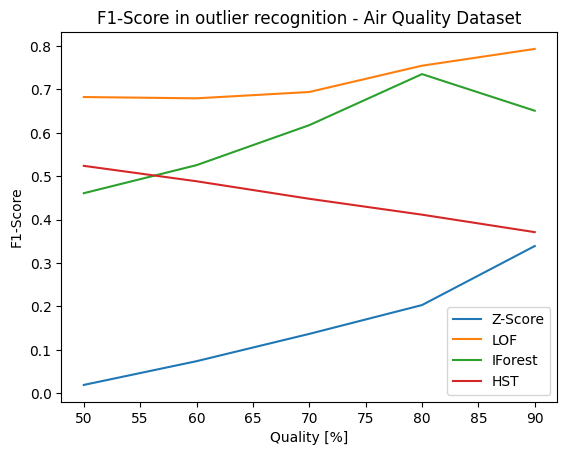

In [9]:
plt.plot(df_z['percentage'], df_z['f1'], label='Z-Score')
plt.plot(df_lof['percentage'], df_lof['f1'], label='LOF')
plt.plot(df_if['percentage'], df_if['f1'], label='IForest')
plt.plot(df_hst['percentage'], df_hst['f1'], label='HST')
plt.title("F1-Score in outlier recognition - Air Quality Dataset")
plt.ylabel("F1-Score")
plt.xlabel("Quality [%]")
plt.legend()

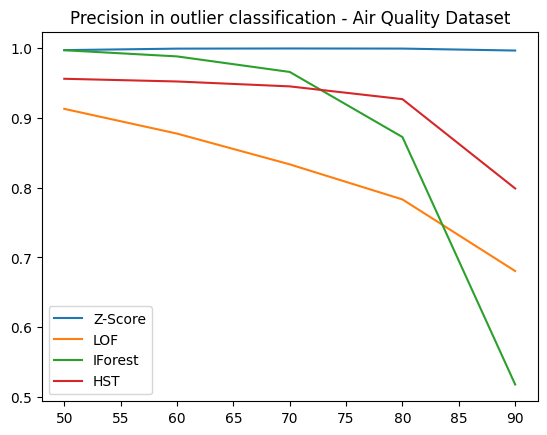

In [10]:
plt.plot(df_z['percentage'], df_z['precision'], label='Z-Score')
plt.plot(df_lof['percentage'], df_lof['precision'], label='LOF')
plt.plot(df_if['percentage'], df_if['precision'], label='IForest')
plt.plot(df_hst['percentage'], df_hst['precision'], label='HST')
plt.title("Precision in outlier classification - Air Quality Dataset")
plt.legend()

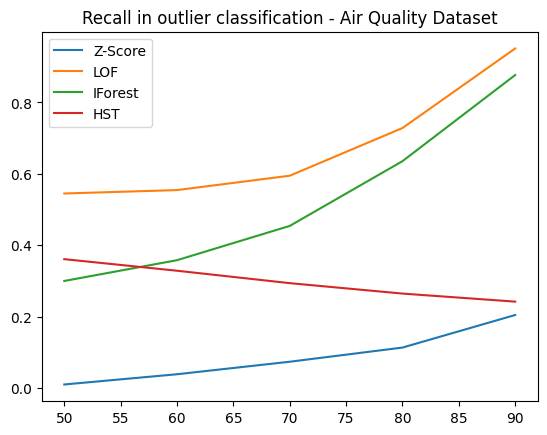

In [11]:
plt.plot(df_z['percentage'], df_z['recall'], label='Z-Score')
plt.plot(df_lof['percentage'], df_lof['recall'], label='LOF')
plt.plot(df_if['percentage'], df_if['recall'], label='IForest')
plt.plot(df_hst['percentage'], df_hst['recall'], label='HST')
plt.title("Recall in outlier classification - Air Quality Dataset")
plt.legend()